In [214]:
#Cargar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
# Descarga los datos de una estación del Servicio Meteorológico Nacional
# http://smn1.conagua.gob.mx/emas/
# Lee un archivo de texto con la función Pandas "read_csv", con elementos separados por mas de 
# un espacio, brincándose 4 renglones del inicio (encabezados)
df0 = pd.read_csv('hermosillo.txt', skiprows=19, sep='\s+',header=None,names=["DD/MM/YY","PRECIP","EVAP","TMAX","TMIN"])
# "Shift + Enter"

In [216]:
# Combinar las columnas "DD/MM/AAAA" con "HH:MM" y convertirla a variable de tiempo
# Se crea una nueva columna "Fecha" al final con formato de tiempo.
# Eliminamos las dos primeras columnas que ya no necesitaremos
#FECHA
df0['FECHA'] = pd.to_datetime(df0.apply(lambda x: x['DD/MM/YY'], 1), dayfirst=True)
df0 = df0.drop(['DD/MM/YY'], 1)
#Presipitación
#df0['PRECIPITACIÓN'] = pd.to_datefloat(df0.apply(lambda x: x['PRECIP'], 1), dayfirst=True)
#df0 = df0.drop(['PRECIP'], 1)

In [217]:
#Tipos de variables
df0.dtypes

PRECIP           float64
EVAP             float64
TMAX             float64
TMIN             float64
FECHA     datetime64[ns]
dtype: object

In [218]:
#Crea una columna de años
df0['MES'] = pd.DatetimeIndex(df0["FECHA"]).month

#Crea una columa de años
df0["AÑO"] = pd.DatetimeIndex(df0["FECHA"]).year

#Crea una columa de los dias
df0["DIA"] = pd.DatetimeIndex(df0["FECHA"]).day

In [219]:
# Lee los primeros 5 renglones del archivo
df0.head()
# "Shift+Enter"

,PRECIP,EVAP,TMAX,TMIN,FECHA,MES,AÑO,DIA
0,0.0,NaN,28.0,NaN,1981-10-14,10,1981,14
1,0.0,7.3,26.0,14.0,1981-10-15,10,1981,15
2,0.0,7.6,28.0,12.5,1981-10-16,10,1981,16
3,0.0,8.1,28.0,10.0,1981-10-17,10,1981,17
4,0.0,1.2,30.5,9.5,1981-10-18,10,1981,18


In [220]:
#Guarda en un arreglo la precipitacion acumulada promedio por año 
df1 = df0.set_index('FECHA').resample('Y')["PRECIP"].mean()

[Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998')]

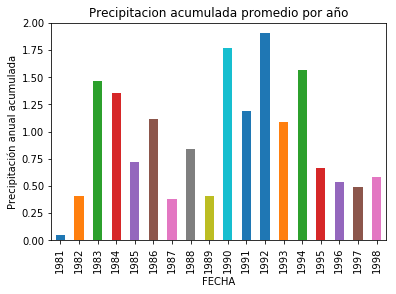

In [221]:
#Grafica d ela precipitacion acumulada por año
ax = df1.plot.bar(x='PRECIP', y='FECHA')
ax.set_ylabel("Precipitación anual acumulada")
ax.set_title('Precipitacion acumulada promedio por año')
ax.set_xticklabels(('1981', '1982', '1983', '1984', '1985', "1986", "1987" , "1988" , "1989" , "1990", "1991" ,"1992", "1993","1994","1995","1996","1997","1998"))



In [222]:
#Guarda en un arreglo la precipitacion acumulada promedio por mes
df2 = df0.set_index('FECHA').resample('M')["PRECIP"].mean()

In [223]:
dfmes = pd.DataFrame()
años = len(df0['AÑO'].unique())
dfmes["MES"] = [i for i in range(1, 13)]
dfmes["PRECIP"] = [df0[df0.MES==i].PRECIP.mean() for i in range (1,13)]
dfmes["TMAX"] = [df0[df0.MES==i].TMAX.mean() for i in range (1,13)]
dfmes["TMIN"] = [df0[df0.MES==i].TMIN.mean() for i in range (1,13)]
print(años)

18


[Text(0, 0, 'ENE'),
 Text(0, 0, 'FEB'),
 Text(0, 0, 'MAR'),
 Text(0, 0, 'ABR'),
 Text(0, 0, 'MAY'),
 Text(0, 0, 'JUN'),
 Text(0, 0, 'JUL'),
 Text(0, 0, 'AGO'),
 Text(0, 0, 'SEP'),
 Text(0, 0, 'OCT'),
 Text(0, 0, 'NOV'),
 Text(0, 0, 'DIC')]

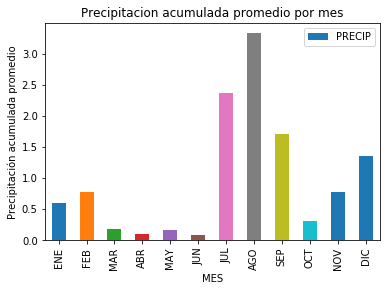

In [224]:
ax = dfmes.plot.bar(x='MES', y='PRECIP')
ax.set_ylabel('Precipitación acumulada promedio')
ax.set_title('Precipitacion acumulada promedio por mes')
ax.set_xticklabels(("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"))


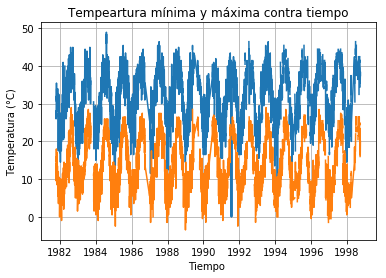

In [225]:
# Data for plotting
t = df0["FECHA"]
s1 = df0["TMAX"] 
s2 = df0["TMIN"] 

fig, ax = plt.subplots()
ax.plot(t, s1)
ax.plot(t, s2)

ax.set(xlabel='Tiempo ', ylabel='Temperatura (°C)',
       title="Tempeartura mínima y máxima contra tiempo")
ax.grid()

fig.savefig("test.png")
plt.show()

Text(0, 0.5, 'Temperatura °C')

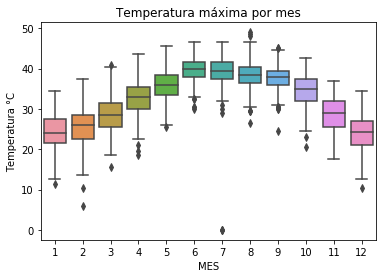

In [226]:
ax = sns.boxplot(x="MES", y="TMAX", data=df0)
plt.title("Temperatura máxima por mes")
plt.ylabel ("Temperatura °C")


Text(0, 0.5, 'Temperatura °C')

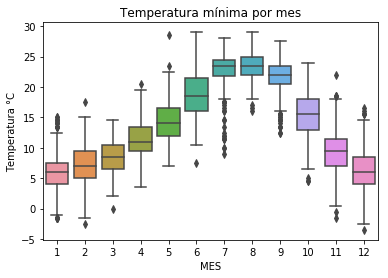

In [227]:
ax = sns.boxplot(x="MES", y="TMIN", data=df0)
plt.title("Temperatura mínima por mes")
plt.ylabel ("Temperatura °C")

Text(0, 0.5, 'Temperatura °C')

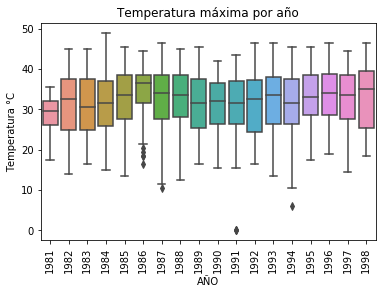

In [228]:
ax = sns.boxplot(x="AÑO", y="TMAX", data=df0)
plt.xticks(rotation=90)
plt.title("Temperatura máxima por año")
plt.ylabel ("Temperatura °C")

Text(0, 0.5, 'Temperatura °C')

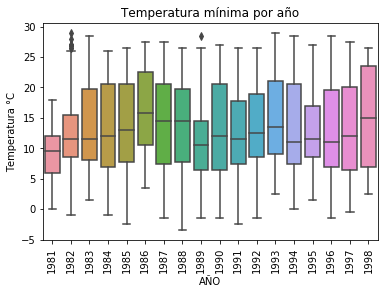

In [229]:
ax = sns.boxplot(x="AÑO", y="TMIN", data=df0)
plt.xticks(rotation=90)
plt.title("Temperatura mínima por año")
plt.ylabel ("Temperatura °C")

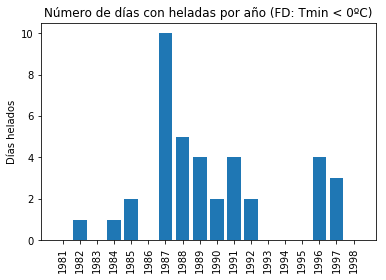

In [230]:
# Número de días con heladas por año (FD: Tmin < 0ºC)
dmin = df0[df0.TMIN < 0]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Días helados')
plt.title('Número de días con heladas por año (FD: Tmin < 0ºC)')
plt.show()

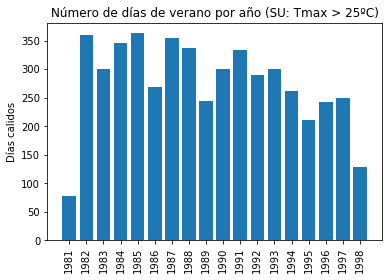

In [231]:
#Número de días de verano por año (SU: Tmax > 25ºC)
dmin = df0[df0.TMAX > 0]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Días calidos')
plt.title('Número de días de verano por año (SU: Tmax > 25ºC)')
plt.show()

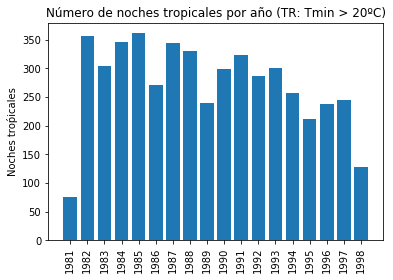

In [232]:
#Número de noches tropicales por año (TR: Tmin > 20ºC)
dmin = df0[df0.TMIN > 0]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Noches troṕicales')
plt.title('Número de noches tropicales por año (TR: Tmin > 20ºC)')
plt.show()

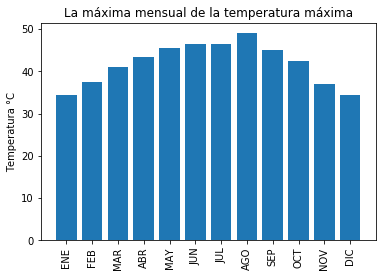

In [233]:
#La máxima mensual de la temperatura máxima, max(Tmax).
temp0 = []
for i in range(1,13):
    t0 = df0[df0.MES==i].TMAX.max()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Temperatura °C')
plt.title("La máxima mensual de la temperatura máxima")
plt.show()

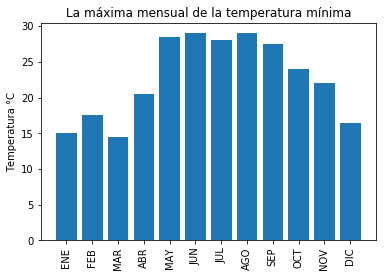

In [234]:
#La máxima mensual de la temperatura mínima, max(Tmin).
temp0 = []
for i in range(1,13):
    t0 = df0[df0.MES==i].TMIN.max()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Temperatura °C')
plt.title("La máxima mensual de la temperatura mínima")
plt.show()

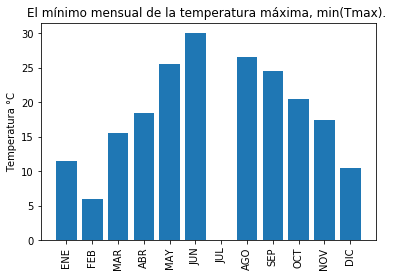

In [235]:
#El mínimo mensual de la temperatura máxima, min(Tmax). 
temp0 = []
for i in range(1,13):
    t0 = df0[df0.MES==i].TMAX.min()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Temperatura °C')
plt.title("El mínimo mensual de la temperatura máxima, min(Tmax). ")
plt.show()

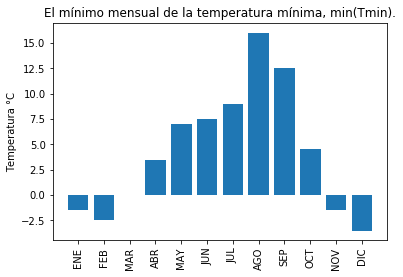

In [236]:
#El mínimo mensual de la temperatura mínima, min(Tmin).
temp0 = []
for i in range(1,13):
    t0 = df0[df0.MES==i].TMIN.min()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Temperatura °C')
plt.title("El mínimo mensual de la temperatura mínima, min(Tmin).")
plt.show()

Text(0.5, 1.0, 'El promedio mensual de la diferencia de temperaturas (Tmax-Tmin).')

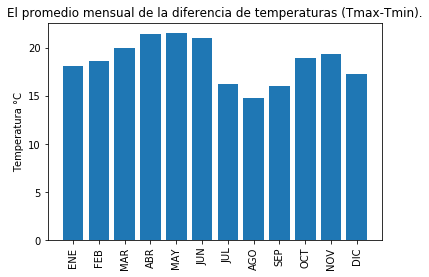

In [237]:
 #El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
temp0 = []
for i in range(1,13):
    t0 = (df0[df0.MES==i].TMAX-df0[df0.MES==i].TMIN).mean()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Temperatura °C')
plt.title("El promedio mensual de la diferencia de temperaturas (Tmax-Tmin).")
#plt.show()

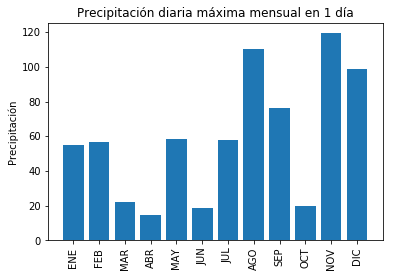

In [238]:
#Precipitación diaria máxima mensual en 1 día.  
temp0 = []
for i in range(1,13):
    t0 = df0[df0.MES==i].PRECIP.max()
    a=[1,2,3,4,5,6,7,8,9,10,11,12]
    temp0.append(t0)
plt.bar(a, temp0)
plt.xticks(a, ("ENE","FEB","MAR","ABR","MAY","JUN","JUL","AGO","SEP","OCT","NOV","DIC"),rotation=90 )
plt.ylabel('Precipitación')
plt.title("Precipitación diaria máxima mensual en 1 día")
plt.show()

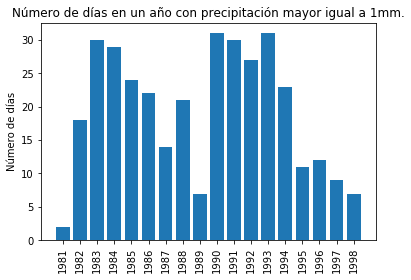

In [239]:
#Número de días en un año con precipitación mayor igual a 1mm.
dmin = df0[df0.PRECIP >= 1]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Número de días')
plt.title('Número de días en un año con precipitación mayor igual a 1mm.')
plt.show()

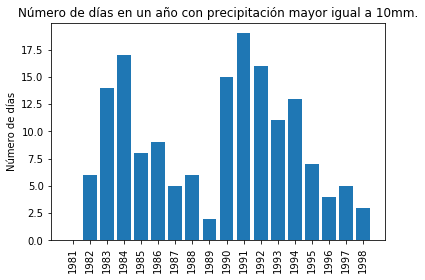

In [240]:
#Número de días en el año con precipitación diaria mayor igual a 10 mm.  
dmin = df0[df0.PRECIP >= 10]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Número de días')
plt.title('Número de días en un año con precipitación mayor igual a 10mm.')
plt.show()


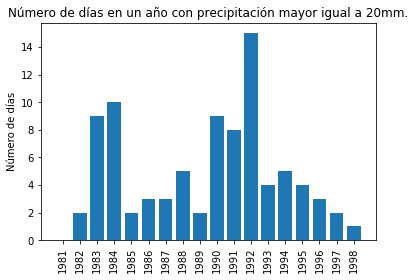

In [241]:
#Número de días en el año con precipitación diaria mayor igual a 20mm. 
dmin = df0[df0.PRECIP >= 20]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Número de días')
plt.title('Número de días en un año con precipitación mayor igual a 20mm.')
plt.show()

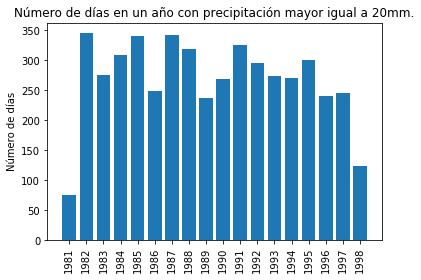

In [242]:
#Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
dmin = df0[df0.PRECIP < 1]
temp0 = []
an = []
for i in range(1981,1999):
    t0 = len(dmin[dmin.AÑO==i])
    a=i
    temp0.append(t0)
    an.append(a)
plt.bar(an, temp0)
plt.xticks(an, an,rotation=90 )
plt.ylabel('Número de días')
plt.title("Número de días consecutivos secos, sin precipitación o precipitación < 1mm.")
plt.show()

In [243]:
#CDD: Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
i = df0['PRECIP'] < 1
j = i.ne(i.shift()).cumsum()

CDD = j[i].value_counts().max()
CDD

183

In [244]:
#CWD ---->Numero de  dìas consecutivos donde la precp >=1
i = df0['PRECIP'] >= 1
j = i.ne(i.shift()).cumsum()

CWD = j[i].value_counts().max()
CWD



4

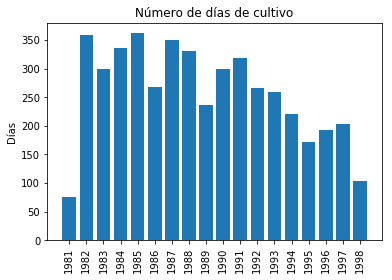

In [247]:
#Longitud de la estación de cultivo por año
#print("Año","   Longitud de la estación de cultivo por año")
data1=[]
data2=[]
for i in range(0, 18):
    init=1981
    count=init + i #for i in range(0, 37)]
    j=(df0[df0.AÑO==(1981+i)].TMIN + df0[df0.AÑO==(1981+i)].TMAX)/2
    ji=len([1 for i in j if i < 5])
    gi=len([1 for i in j if i > 5])
    ci=ji+gi
    j=g=0
    data1.append(count)
    data2.append(ci)
df3=pd.DataFrame({"AÑO" : data1, "CULT" : data2})

x=df3.AÑO
y=np.arange(len(x))
C=df3.CULT

plt.bar(y, C, align='center')
plt.xticks(y, x,rotation=90)
plt.ylabel('Días')
plt.title("Número de días de cultivo")
plt.show()



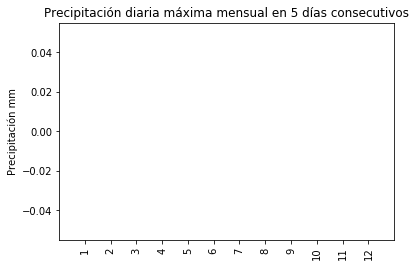

In [248]:
#Rx5 day: Precipitación diaria máxima mensual en 5 días consecutivos.
datos1=[]
datos2=[]
datos3=[]
pmax=[]
count=[]
p=[]
meses=[]

for i in range (0,17):
    df3=pd.DataFrame({"MES" : df0[df0.AÑO==(1981+i)].MES, "PRECIP" : df0[df0.AÑO==(1981+i)].PRECIP})
    for j in range (0,12):
        count.append(j+1)
        df4=pd.DataFrame({"PRECIP" : df3[df3.MES==j+1].PRECIP})
        k=len(df4)
        df4.index = np.arange(0,k) 
        for c in range (0,k-5):
            j1=df4.PRECIP[c]
            j2=df4.PRECIP[c+1]
            j3=df4.PRECIP[c+2]
            j4=df4.PRECIP[c+3]
            j5=df4.PRECIP[c+4]
            if (j1 != 0.0 and j2 != 0.0 and j3 != 0.0 and j4 != 0.0 and j5 != 0.0):
                v= j1+j2+j3+j4+j5
                datos2.append(v)    
            else:
                datos2.append(0)
        df5=pd.DataFrame({"P" : datos2})
        s=df5.P.max()
        pmax.append(s)
        datos2=[]
for i in range (0,17):
    for x in range (0,12):
        meses.append(x+1)
df7=pd.DataFrame({"MES" : meses, "P5" : pmax})
meses=[]
count=[]
for i in range(0,12):
    count.append(i+1)
    l=df7[df7.MES==i+1].P5.max()
    meses.append(l)
df8=pd.DataFrame({"MES" : count, "Pmax5" : meses})

x=df8.MES
y=np.arange(len(x))
p=df8.Pmax5

plt.bar(y, p, align='center')
plt.xticks(y, x, rotation=90)
plt.ylabel('Precipitación mm')
plt.title("Precipitación diaria máxima mensual en 5 días consecutivos")
plt.show()